In [42]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector

In [43]:
qr = QuantumRegister(2)

In [44]:
cr = ClassicalRegister(1)

In [45]:
circuit = QuantumCircuit(qr, cr)

In [46]:
%matplotlib inline

In [47]:
circuit.x(0)
circuit.draw()

┌───┐
q2_0: ┤ X ├
      └───┘
q2_1: ─────
           
c4: 1/═════

In [48]:
circuit = QuantumCircuit(2, 2)
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


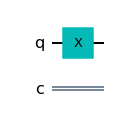

In [50]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)
circuit.draw(output='mpl')

[0.+0.j 1.+0.j]


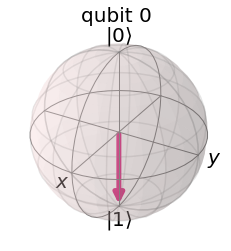

In [54]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

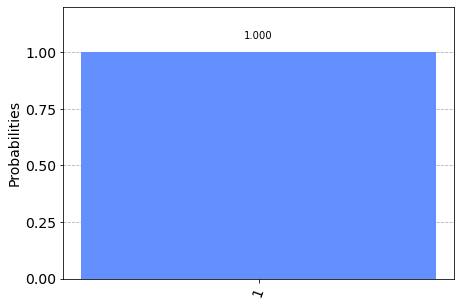

In [58]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 3).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

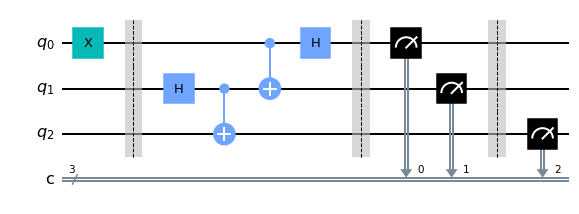

In [68]:
#q0가 1인 상태를 q2가 무조건 1이 나오게 상태를 전달.
circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [0,1])
%matplotlib inline
circuit.draw(output='mpl')
circuit.barrier()
#circuit.cx(1,2)
#circuit.cz(0,2)
circuit.measure(2,2)
circuit.draw(output='mpl')

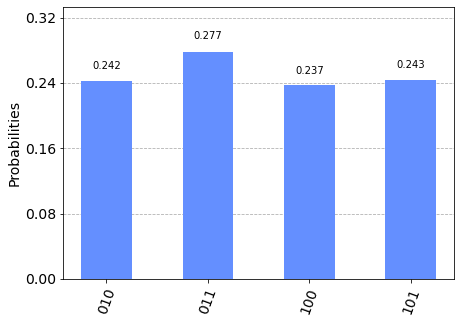

In [69]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)